# Age Estimation

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
cd /content/drive/MyDrive/Colab Notebooks/CIS581/CIS_5810_Project_7_Linear_Regression_Student_Files_V2

/content/drive/MyDrive/Colab Notebooks/CIS581/CIS_5810_Project_7_Linear_Regression_Student_Files_V2


In [219]:
import numpy as np
import os
from prepare_data_sgd import *

In [220]:
epoch = 1000
epoch_sgd = 1000
momentum = True

# Loading Data

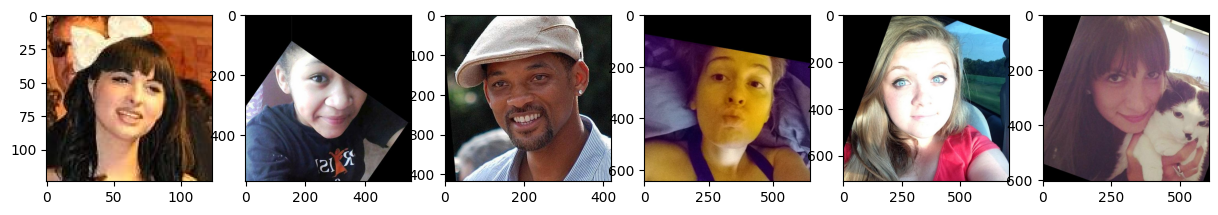

In [221]:
base_dir = 'DATASET/'

age_train, features_train = prepare_data('train', base_dir)
age_val, features_val = prepare_data('val', base_dir)
_, features_test = prepare_data('test', base_dir)
show_data(base_dir)

# Implement Closed Form Solution
```
Arguments:
    age          -- numpy array, shape (n, )
    features     -- numpy array, shape (n, 2048)
Returns:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [222]:
def closed_form_solution(age, features):
    # Preprocess
    H = features
    ones = np.ones(len(H))
    H = np.column_stack((ones,H))
    Y = age

    # Define parameter weights

    ##########################################################################
    # TODO: YOUR CODE HERE
    ##########################################################################
    # calculate the closed form solution
    HTH = H.T @ H
    weights = np.linalg.inv(HTH) @ H.T @ Y


    # separate the weights and bias
    bias = weights[0]
    weights = weights[1:]

    return weights, bias

# Validate

Your validate loss is: 67.84


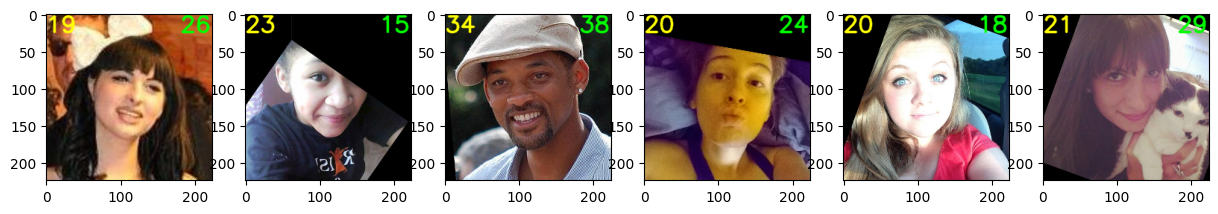

In [223]:
w, b = closed_form_solution(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate loss is:", round(loss, 3))

# Test and Generate results file

In [224]:
prediction = test(w, b, features_test, 'cfs.txt')
print("Test results has saved to cfs.txt")
print(prediction[:10])


Test results has saved to cfs.txt
[[28.04639962]
 [60.90374508]
 [55.19594938]
 [23.35683533]
 [35.20122167]
 [34.36335499]
 [36.63257246]
 [44.11504383]
 [18.49147786]
 [57.60077161]]


# Implement Gradient descent
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [225]:
def gradient_descent(age, feature):
    assert len(age) == len(feature)
    # Init weights and bias
    weights = np.random.randn(feature.shape[1], 1)
    bias = np.random.randn(1, 1)
    # Learning rate
    lr = 10e-3
    age = age.reshape(-1,1)
    n = len(age)
    loss = 0
    for e in range(epoch):
        ##########################################################################
        # TODO: YOUR CODE HERE
        ##########################################################################

        # forward pass
        pred = feature @ weights + bias

        # calculate loss
        loss = np.mean((pred - age) ** 2)

        # calculate gradient
        dw = (2 / n) * (feature.T @ (pred - age))
        db = (2 / n) * np.sum(pred - age)

        # update weights
        weights -= lr * dw
        bias -= lr * db

        if momentum:
          pass

    return weights, bias

# Train and validate

Your validate score is: 59.521


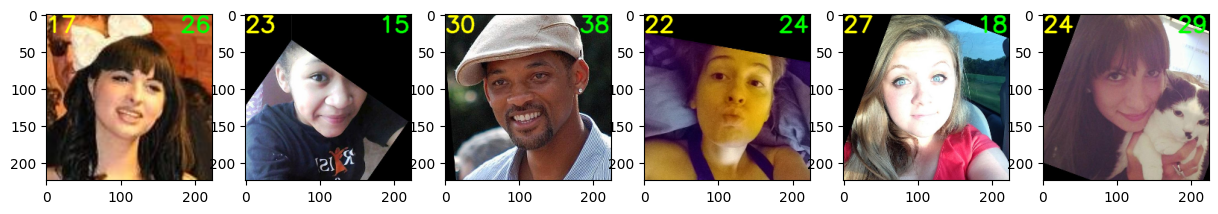

In [226]:
w, b = gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

#  Test and Generate results file

In [227]:
prediction = test(w, b, features_test, 'gd.txt')
print("Test results has saved to gd.txt")
print(prediction[:10])

Test results has saved to gd.txt
[[27.52673457]
 [72.85743717]
 [49.25883316]
 [21.64109994]
 [34.7366488 ]
 [31.52080763]
 [33.59300387]
 [42.47751276]
 [22.5172749 ]
 [54.75626253]]


# Implement Stochastic Gradient descent
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.
```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [228]:
def stochastic_gradient_descent(age, feature):
    # check the inputs
    assert len(age) == len(feature)

    # Set the random seed
    np.random.seed(0)

    # Init weights and bias
    weights = np.random.randn(feature.shape[1], 1)
    bias = np.random.randn(1, 1)
    age = age.reshape(-1,1)
    # Learning rate
    lr = 10e-5

    # Batch size
    batch_size = 16

    # Number of mini-batches
    t = len(age) // batch_size
    loss = 0
    for e in range(epoch_sgd):
        # Shuffle training data
        n = np.random.permutation(len(feature))

        for m in range(t):
            # Providing mini batch with fixed batch size of 16
            batch_feature = feature[n[m * batch_size : (m+1) * batch_size]]
            batch_age = age[n[m * batch_size : (m+1) * batch_size]]

            ##########################################################################
            # TODO: YOUR CODE HERE
            ##########################################################################
            # forward pass
            pred = batch_feature @ weights + bias

            # calculate loss
            loss = np.mean((pred - batch_age) ** 2)

            # calculate gradient
            dw = (2 / batch_size) * (batch_feature.T @ (pred - batch_age))
            db = (2 / batch_size) * np.sum(pred - batch_age)

            # update weights
            weights -= lr * dw
            bias -= lr * db

            if momentum:
              pass

    return weights, bias

# Train and validate

Your validate score is: 57.464


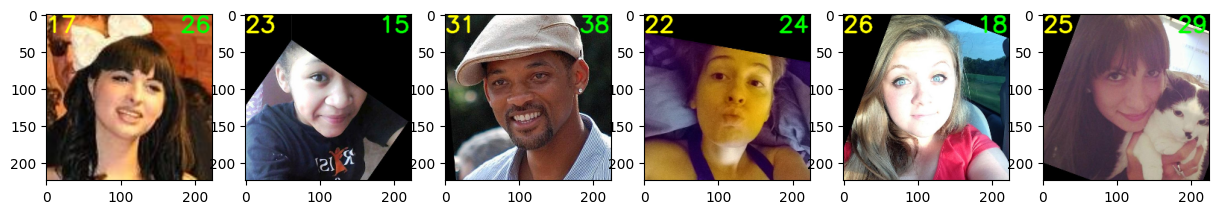

In [229]:
w, b = stochastic_gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

# Test and Generate results file

In [230]:
prediction = test(w, b, features_test, 'sgd.txt')
print("Test results has saved to sgd.txt")
print(prediction[:10])

Test results has saved to sgd.txt
[[27.1455845 ]
 [73.47474455]
 [47.75437641]
 [22.23806831]
 [34.65339682]
 [32.78291929]
 [35.15490334]
 [42.07645992]
 [22.15667806]
 [55.10025296]]


# Reflection

Now that you implemented the three methods, which method performed the best and why do you think so? How do you think you can improve your age estimation model to give better results?

(Please include your answers in the Colab Notebook)



It looks like that the stochastic gradient descent performs the best with the least loss. This might because the features have nonlinear relationship and might be fit well by the closed form. Therefore, gradient descent (particularly stochastic gradient descent) can provide a better generalization to the data and avoid the potential local minimum. We can also see that images are transformed randomly, therefore, there are many noises in the data and SGD are robust to them comparing to other two.

To perform better, we can use preprocess data and apply data augmentation so that we can fit a better model with transformed data. Also, tuning the hyperparameter and implementing cross validation allow us to select the best models from many models so that provide the best generalization to the data.